# Practica 2 robots

In [12]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt 
import pickle
import pathlib



directory = "D:\\Robots\\PracticaRobots2\\" # cambiar aqui

Para cargar un video y sacar capturas de él:

In [2]:
cap = cv2.VideoCapture(directory + 'habitacion_juegos.mp4') # cambiar aqui

image_count = 0 

while(True):
    
    ret, frame = cap.read()
    
    if ret:

        cv2.imshow('habitacion_roja',frame)

        k = cv2.waitKey(10) # a mayor numero mas lento va
        
        if k & 0xFF == ord('q'):
            break

        if k==32:    # tecla espacio
            
            # ojito que esto sobreescribe si hay una imagen ya...
            cv2.imwrite(directory + "juegos_oficina\\landmark_" + str(image_count) + ".jpg", frame) # cambiar aqui
            image_count+=1
    else:
        break

    
cap.release()
cv2.destroyAllWindows()

Sacar los histogramas:

In [25]:
def load_images(filenames, gray_scale=True):
    """
        Load multiple images.
        
        Parameters:
            filename is an array of paths
            gray_scale whether the images will be load in gray scale or not 
            
        Returns:
            (images, images_name)
    """
    
    filenames.sort()
    images = []
    images_names = []
    
    u=0
    for img in filenames:
        if gray_scale:
            i = cv2.imread(img)
            gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
            images.append(gray)
        else:
            images.append(cv2.imread(img))
            
        images_names.append(os.path.basename(filenames[u]))
        u+=1
    
    return (images, images_names)

Renombrar los landmarks: (ya no deberia usarse)

In [ ]:
estas_seguro = False

if estas_seguro: # por si acaso lo ejecutamos sin querer
    for l in range(1,10):
        f = 0
        for path in pathlib.Path(directory + 'landmarks_img/'+ str(l)).iterdir():
            if path.is_file():

                old_name = path.stem

                old_extension = path.suffix

                new_name = 'landmark_' + str(l-1) + '_frame_' + str(f) + old_extension

                path.rename(pathlib.Path(directory + 'landmarks_img/'+ str(l), new_name))
                f+=1


Se calculan los histogramas, se normalizan y se guardan en local

In [ ]:
# codigo para cargar el archivo
def load_pickle(filename):
    return pickle.load(open(filename, 'rb'))



In [43]:
all_hist = []

for l in range(9):
    filenames = [img for img in glob.glob(directory + "landmarks_img/" + str(l)+ "/*.jpg")]
    filenames.sort()

    images    = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in filenames]
    img_names = [os.path.basename(img)                 for img in filenames]
    
    hist_dict = {}

    for i, img in enumerate(images):
        x, y = img.shape

        hist = cv2.calcHist([img],[0],None,[256],[0,256])
        hist_norm = hist / (x * y)

        name = img_names[i]
        hist_dict[name] = hist_norm 

    all_hist.append(hist_dict)
    
    print(len(hist_dict))
    
    # guarda el objeto:
    pickle.dump(all_hist, open('histogram_landmarks_' + str(l) +'.sav', 'wb'))
    # por algun motivo no genera los .sav

In [32]:
def Normalize(images):
    
    
    
    for img in images:
        
    
        stdR = np.std(image) #Calculamos la varianza para cada espacio de color

        R = np.mean(image) #La mediana de cada espacio de color

        image = image - R


        image = image/stdR


        minimoR = np.min(image)


        image = image-minimoR # Restamos el valor minimo de cada espacio para que el valor mas bajo sea 0


        maximoR = np.max(image) 


        factorR = 1/maximoR #Calculamos el factor escala por el que hay que multiplicar cada espacio para que su valor maximo sea 1


        image = image * factorR #Operamos de modo que cada color tiene sus valores comprendidos entre [0,1]

    return image

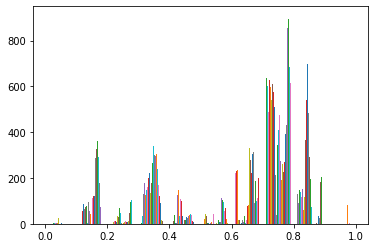

In [36]:
new_hist = Normalize(images[0])

plt.hist(new_hist, bins=10)
plt.show()

In [ ]:
def histeq(im,nbr_bins=256):

    #get image histogram
    imhist,bins = np.histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() #cumulative distribution function
    cdf = 255 * cdf / cdf[-1] #normalize

    #use linear interpolation of cdf to find new pixel values
    im2 = np.interp(im.flatten(),bins[:-1],cdf)

    return im2.reshape(im.shape), cdf

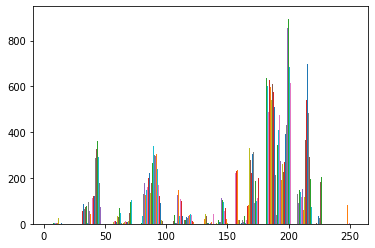

In [40]:

stds = []
means = []

for img in images:
    stds.append(np.std(img))
    means.append(np.mean(img))

desviation = np.mean(stds)
mean = np.mean(means)

for img in images:
    img = img - mean
    img = img/desviation
    minimo = np.min(img)
    img = img - minimo
    maximo = np.max(img)
    factor = 1/maximo
    img = img*factor
    
    
    
plt.hist(images[0], bins=10)
plt.show()
    
    